<a href="https://colab.research.google.com/github/smo216/Machine-Learning-Project/blob/master/Machine_Learning_Final_Project_Sliced_DASK_Image_Analysis_11_1_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Attempts at image processing involve using PCA, Isomap and Tsne

Currently the images are fed in as raw 16 bit 20x20 images for a single alloy

Questions:
What Catagorical variables are important?

What preprocessing should be done?

Future work: 

Adapt Unet-NN for image segmentation

Resnet-NN for image classification


In [0]:
#load multiple data
"""Utilize histogram matching to normalize images? https://scikit-image.org/docs/stable/auto_examples/transform/plot_histogram_matching.html#sphx-glr-auto-examples-transform-plot-histogram-matching-py"""

from google.colab import drive
drive.mount('/content/gdrive')
!pip install numpy==1.15.0 #need Numpy 1.15 or it breaks
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import numpy as np
import pandas as pd
import os

from PIL import Image
from pylab import *
# importing os module 
import os 
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import histogram
import skimage
import pandas as pd
from pandas import read_csv
import h5py
from skimage import io

train_data_path=r"//content//gdrive//My Drive//PhD Image Processing//Python HP//H5Test Files"
os.chdir(train_data_path)
data=pd.read_hdf('HP1620x20pd4.h5')
firstdata=data[(data["I"]==0)]
Xog=firstdata["Image"].values


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Data is imported as a H5 pandas dataframe with each image being 20x20 pixels and 16 bit

In [0]:
#defining several variables for later use in the different machine learing models
n_samples = data['Image'].shape[0]
h, w = data['Image'][0].shape

n_features = h*w

#X will remain the main data variable for the different models
#if it is modified the previous version is usual saved to some other variable
Xog = data['Image'].values


for i in range(Xog.shape[0]):
    Xog[i] = Xog[i].reshape(n_features)

X = np.vstack(Xog)
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
#print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1565700
n_features: 400


In [0]:
"""Filters to grab first image"""
firstdata=data[(data["I"]==0)]
firstimg=firstdata["Image"].values
print(firstdata)

from sklearn.decomposition import PCA
n_samplesfd = firstdata.shape[0]

d2_firstdata=[]
for i in range(firstdata.shape[0]):
    firstimg[i] = firstimg[i].reshape(n_features)
d2_firstdata = np.vstack(firstimg)
compfd=h*w
pcafd = PCA(n_components=compfd)
pcafd.fit(d2_firstdata)
PCA(copy=True, iterated_power='auto', n_components=compfd , random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

                                                   Image  ...     Std. Dev.
0      [65535, 65535, 65535, 65535, 65535, 65535, 655...  ...  15297.291338
1      [31611, 14649, 8224, 6168, 4883, 4626, 4626, 4...  ...   9093.075854
2      [32639, 33410, 32896, 32382, 31868, 31868, 313...  ...    960.798332
3      [35209, 34952, 35209, 33667, 34952, 34438, 352...  ...    659.332736
4      [34695, 34438, 34438, 34695, 34181, 34181, 339...  ...   1378.005236
...                                                  ...  ...           ...
62623  [34952, 35466, 35980, 34181, 34438, 34181, 344...  ...   1367.356992
62624  [35723, 36494, 35723, 35466, 36237, 36494, 362...  ...   1400.761844
62625  [37008, 38036, 37522, 37008, 37008, 36751, 380...  ...   1382.559531
62626  [35980, 35723, 35980, 36237, 35980, 35980, 357...  ...   1408.841646
62627  [37008, 35980, 37008, 36237, 36751, 39064, 398...  ...   1221.390810

[62628 rows x 7 columns]


PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 1.0, 'Standard Deviation')

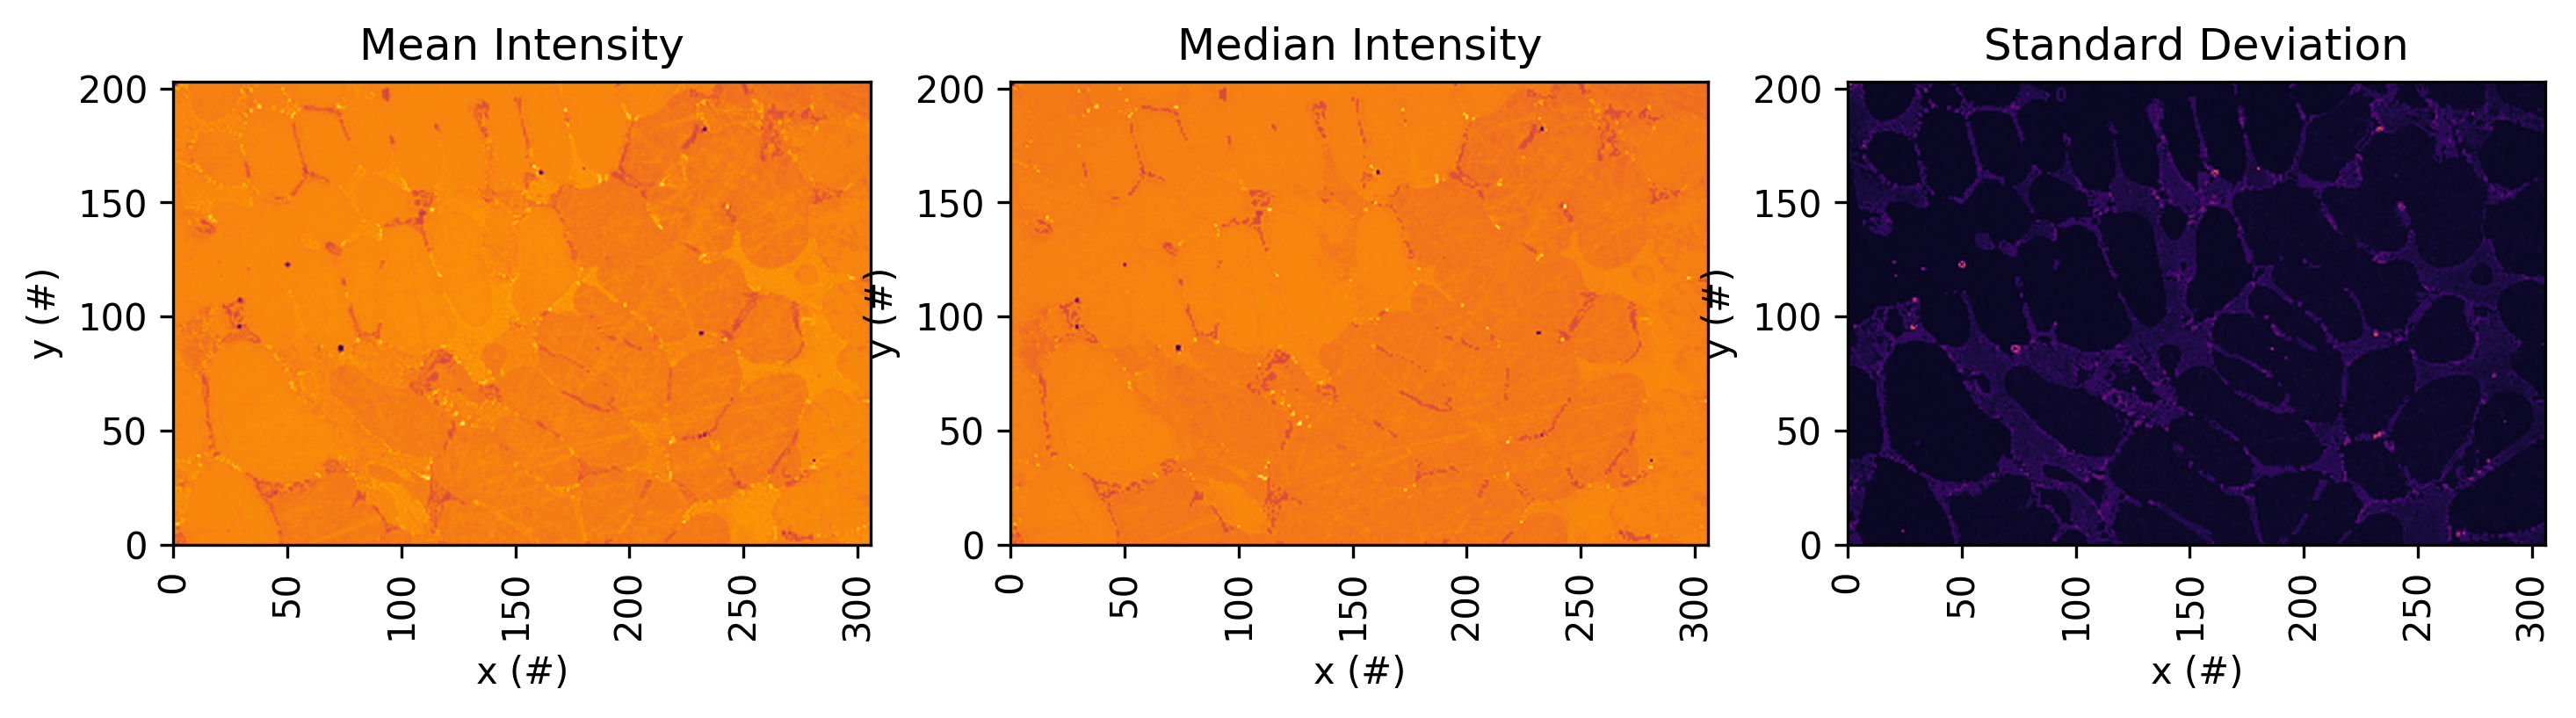

In [0]:
#import some more stuff for plotting purposes
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata

#defining variables for plotting
x = firstdata['X'].values
y = firstdata['Y'].values
mean = firstdata['Mean'].values
med = firstdata['Median'].values
std = firstdata['Std. Dev.'].values

#determine grid boundaries
gridsize = 1000
x_min = 0
x_max = x.max()
y_min = 0
y_max = y.max()

xx = np.linspace(x_min, x_max, gridsize) # array of x values
yy = np.linspace(y_min, y_max, gridsize) # array of y values
grid = np.array(np.meshgrid(xx, yy.T))
grid = grid.reshape(2, grid.shape[1]*grid.shape[2]).T


fig, axs = plt.subplots(1, 3, dpi=300, constrained_layout=False, figsize=(2,10))

for i, j in enumerate([mean,med,std]):

    points = np.array([x, y]).T # because griddata wants it that way
    z_grid2 = griddata(points, j, grid, method='cubic')
    # you get a 1D vector as result. Reshape to picture format!
    z_grid2 = z_grid2.reshape(xx.shape[0], yy.shape[0])

    axs[i].imshow(z_grid2, extent=[x_min, x_max,y_min, y_max],
            origin='upper', cmap=cm.inferno)
    

    #plt.xticks(rotation='90')
    axs[i].set_xlabel('x (#)')
    axs[i].set_xticks(np.arange(x_min,x_max+1,50,))
    axs[i].set_ylabel('y (#)')
    axs[i].set_yticks(np.arange(y_min,y_max+1,50))
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90)

#plt.xticks(rotation='90')
plt.subplots_adjust(left=0.5,right=5)
axs[0].set_title('Mean Intensity')
axs[1].set_title('Median Intensity')
axs[2].set_title('Standard Deviation')

First attempt-PCA as it is the fastest to run and gives an indication of how many components are needed to represent the dataset

Text(0, 0.5, 'cumulative variance')

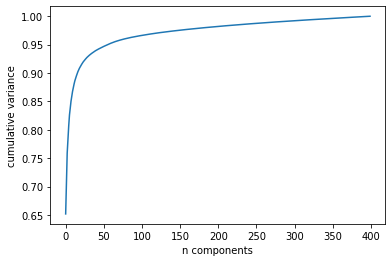

In [0]:
import numpy as np
#import dask.array as da
#!pip install dask_ml
#import dask
from sklearn.decomposition import PCA
#from dask_ml.decomposition import PCA
#d2_dX = Xog.reshape((n_samples,h*w))
comp=n_features
n_components=n_features
dX =X#d2_dX
pca = PCA(n_components=comp)
pca.fit(dX)
PCA(copy=True, iterated_power='auto', n_components=comp , random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
#print(pca.explained_variance_ratio_)  
#print(pca.singular_values_)  

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')

Appears to converge at less than 25 components

Projecting the input data on the eigenstructures orthonormal basis


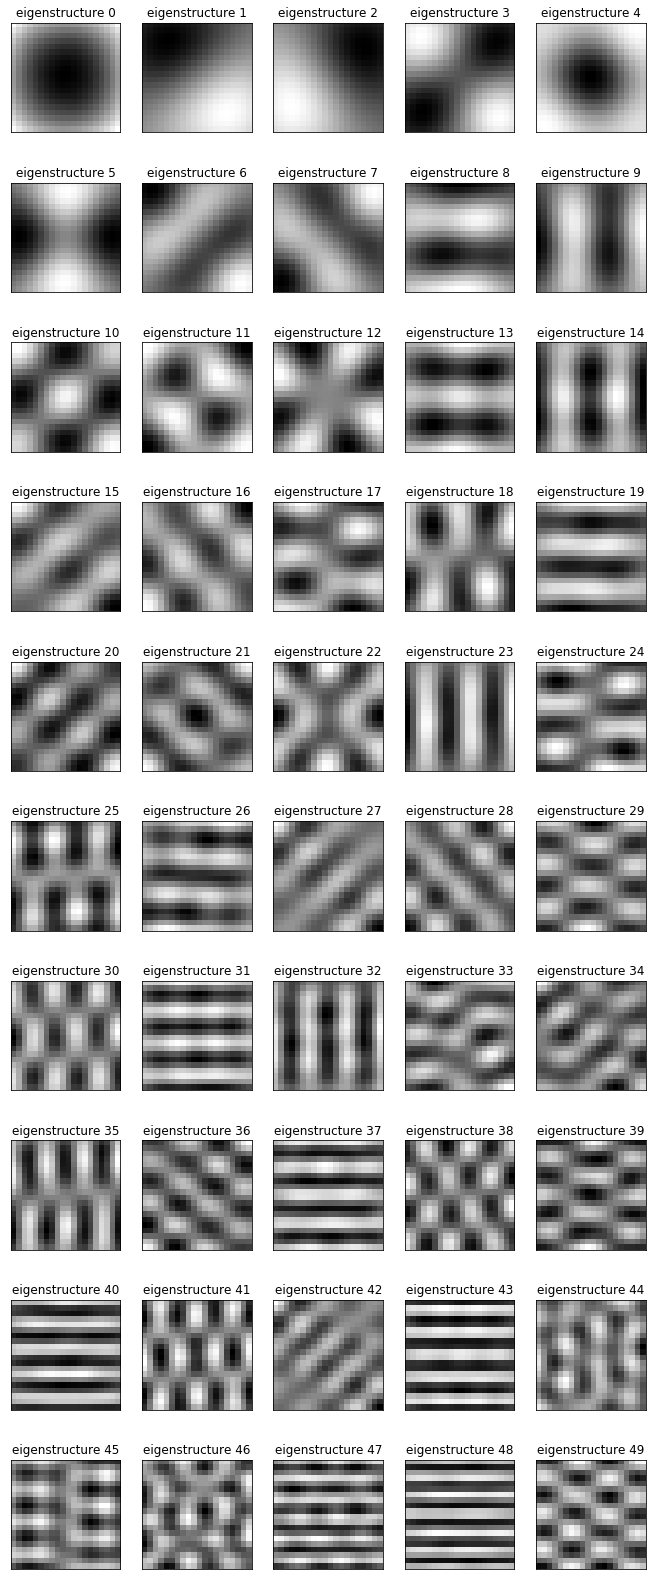

In [0]:
eigenfaces = pca.components_.reshape((comp, h,w))
print("Projecting the input data on the eigenstructures orthonormal basis")

target_names=['HP-6']


def plot_gallery(images, titles, h, w, n_row=10, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenstructure %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()


PCA appears to be identifying some patterns

In [0]:
"""!pip install dask_ml
For Kmeans DASK

from dask_ml.cluster import KMeans
clf = KMeans(init_max_iter=3, oversampling_factor=10)
%time clf.fit(X)
clf.labels_
clf.labels_[:10].compute()"""

'!pip install dask_ml\nFor Kmeans DASK\n\nfrom dask_ml.cluster import KMeans\nclf = KMeans(init_max_iter=3, oversampling_factor=10)\n%time clf.fit(X)\nclf.labels_\nclf.labels_[:10].compute()'

In [0]:
#Plotting the first first PCA components as abundance maps on the scan region. Plotting the mean value from the pandas
#dataframe roughly approximates the SEM image for comparison

pca_comp = 30
pca_lst=[]

for i in range(pca_comp):
    pca_lst.append(X_pca[:,i])
    
#import some more stuff for plotting purposes
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata

#defining variables for plotting
x = data['X'].values
y = data['Y Real'].values


#determine grid boundaries
gridsize = 1000
x_min = 0
x_max = 12000
y_min = 0
y_max = 105000

xx = np.linspace(x_min, x_max, gridsize) # array of x values
yy = np.linspace(y_min, y_max, gridsize) # array of y values
grid = np.array(np.meshgrid(xx, yy.T))
grid = grid.reshape(2, grid.shape[1]*grid.shape[2]).T
    
fig, axs = plt.subplots(1, pca_comp, dpi=1000, constrained_layout=False, figsize=(3,6))

fig.suptitle('PCA Abundance Maps',x=2.75,horizontalalignment='center',y=0.95, fontsize=16)

for i, j in enumerate(pca_lst):

    points = np.array([x, y]).T # because griddata wants it that way
    z_grid2 = griddata(points, j, grid, method='nearest')
    # you get a 1D vector as result. Reshape to picture format!
    z_grid2 = z_grid2.reshape(xx.shape[0], yy.shape[0])

    axs[i].imshow(z_grid2, extent=[x_min, x_max,y_min, y_max],
            origin='upper', cmap=cm.inferno)
    
    axs[i].set_xlabel('')
    axs[i].set_xticks([])
    axs[i].set_ylabel('')
    axs[i].set_yticks([])
    axs[i].set_title(str(i), y=1.01)
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90)

plt.subplots_adjust(left=0.5,right=5)

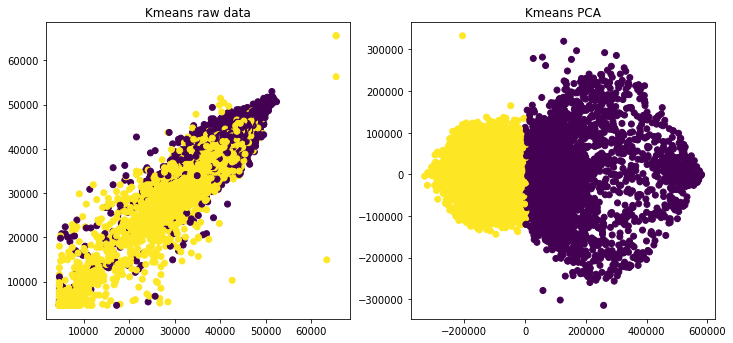

In [8]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause
#takes a while

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

random_state = 170
X=dX

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Kmeans raw data")

X_pca = pca.transform(X)
#t0 = time()
k2_pca_pred = KMeans(n_clusters=2).fit_predict(X_pca)

# Incorrect number of clusters
#y_pred = KMeans(n_clusters=10, random_state=random_state).fit_predict(X)

plt.subplot(222)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=k2_pca_pred)
plt.title("Kmeans PCA")

plt.show()

Initial grouping is poor but PCA helps organize the data

Now Try Isomap as it seemed to work well for the mnist data and is a less complex nonlinear dimensionality reduction method

In [0]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
X_iso = model.fit_transform(X_pca)
X_iso.shape

In [0]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

In [0]:
fig, ax = plt.subplots(figsize=(16, 16))
plot_components(X_pca,
                model=Isomap(n_components=2),
                images=Xog[:, ::2, ::2])

Next try TSNE


In [0]:
import numpy as np
from sklearn.manifold import TSNE
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = TSNE(n_components=2, init='pca', random_state=0).fit_transform(dX_pca)
t0 = time()
X_tsne = tsne#.fit_transform(d2_imdat)
X_tsne.shape

fig, ax = plt.subplots(figsize=(16, 16))
plot_components(X_pca,X_tsne,images=Xog[:, ::2, ::2])

#plot_embedding(X_tsne,
#               "t-SNE embedding of the digits (time %.2fs)" %
#               (time() - t0))

In [0]:
#Crashes here!
from matplotlib import cm

x = firstdata['X'].values
y = firstdata['Y'].values
#determine grid boundaries
gridsize = 400000
x_min = 0
x_max = 6140 #6140
y_min = 0
y_max = 4080 #4080
X=d2_firstdata
X_pca = pcafd.transform(d2_firstdata)
xx = np.linspace(x_min, x_max, gridsize) # array of x values
yy = np.linspace(y_min, y_max, gridsize) # array of y values
grid = np.array(np.meshgrid(xx, yy.T))
grid = grid.reshape(2, grid.shape[1]*grid.shape[2]).T


fig, axs = plt.subplots(1, 2, dpi=300, constrained_layout=False, figsize=(2,2))
for i, j in enumerate([X,X_pca]):

    points = np.array([x, y]).T # because griddata wants it that way
    z_grid2 = griddata(points, j, grid, method='cubic')
    # you get a 1D vector as result. Reshape to picture format!
    z_grid2 = z_grid2.reshape(xx.shape[0], yy.shape[0])

    axs[i].imshow(z_grid2, extent=[x_min, x_max,y_min, y_max],
            origin='upper', cmap=cm.inferno)
    

    #plt.xticks(rotation='90')
    axs[i].set_xlabel('x (um)')
    axs[i].set_xticks(np.arange(x_min,x_max+1,50,))
    axs[i].set_ylabel('y (um)')
    axs[i].set_yticks(np.arange(y_min,y_max+1,50))
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90)

#plt.xticks(rotation='90')
#plt.subplots_adjust(left=0.5,right=5)
#axs[0].set_title('Ground Truth', y=1.01)
#axs[1].set_title('SVM with PCA', y=1.01)
axs[0].set_title('K-means with PCA', y=1.01)
axs[1].set_title('K-means', y=1.01)

In [0]:
"""Kmeans Clustering"""
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np
import dask.array as da
!pip install dask_ml
import dask
from dask_ml.decomposition import PCA
n_samples, h, w = imdat.shape
d2_dX = imdat.reshape((n_samples,h*w))
comp=300
n_components=comp
dX =d2_dX
data=dX
pca = PCA(n_components=comp)
pca.fit(dX)
PCA(copy=True, iterated_power='auto', n_components=comp , random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
#print(pca.explained_variance_ratio_)  
#print(pca.singular_values_)  
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [0]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [0]:
"""use unet-work in progress"""
import tf_unet
import tensorflow as tf
from tf_unet import unet, util, image_util

#preparing data loading
data_provider = image_util.ImageDataProvider("/Slice/1/*.png")

#setup & training
net = unet.Unet(layers=3, features_root=64, channels=1, n_class=2)
trainer = unet.Trainer(net)
path = trainer.train(data_provider, output_path, training_iters=32, epochs=100)

#verification
...

prediction = net.predict(path, data)

unet.error_rate(prediction, util.crop_to_shape(label, prediction.shape))

img = util.combine_img_prediction(data, label, prediction)
#util.save_image(img, "prediction.jpg")

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)



In [0]:
from matplotlib import pyplot as plt
#from scipy.misc import lena, ascent

source = cropim17[0]#lena()
template = cropim6[0]#ascent()
matched = hist_match(source, template)

def ecdf(x):
    """convenience function for computing the empirical CDF"""
    vals, counts = np.unique(x, return_counts=True)
    ecdf = np.cumsum(counts).astype(np.float64)
    ecdf /= ecdf[-1]
    return vals, ecdf

x1, y1 = ecdf(source.ravel())
x2, y2 = ecdf(template.ravel())
x3, y3 = ecdf(matched.ravel())

fig = plt.figure(figsize=(10,6))
gs = plt.GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs[1, :])
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source, cmap=plt.cm.gray)
ax1.set_title('Source')
ax2.imshow(template, cmap=plt.cm.gray)
ax2.set_title('template')
ax3.imshow(matched, cmap=plt.cm.gray)
ax3.set_title('Matched')

ax4.plot(x1, y1 * 100, '-r', lw=3, label='Source')
ax4.plot(x2, y2 * 100, '-k', lw=3, label='Template')
ax4.plot(x3, y3 * 100, '--r', lw=3, label='Matched')
ax4.set_xlim(x1[0], x1[-1])
ax4.set_xlabel('Pixel value')
ax4.set_ylabel('Cumulative %')
ax4.legend(loc=5)

In [0]:
imshow(matched, cmap=plt.cm.gray)

In [0]:
"""Aggregated Histogram of Dataset- BSE image contrast is related to atomic # of phases
save histogram datapoints to compare to other samples??"""
#plot Histogram

histim=cropim6
#histim = skimage.img_as_ubyte(cropim6) #8 bit

hist, hist_centers = histogram(histim) #aggregated histogram

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(cropim6[0], cmap=plt.cm.gray) #example image
ax[0].axis('off')

ax[1].semilogy(hist_centers, hist, lw=2)
ax[1].set_title('Histogram of grey values')

plt.tight_layout()


In [0]:
"""Aggregated Histogram of Dataset- BSE image contrast is related to atomic # of phases
save histogram datapoints to compare to other samples??"""
#plot Histogram

histim=cropim6
#histim = skimage.img_as_ubyte(cropim6) #8 bit

hist, hist_centers = histogram(histim) #aggregated histogram

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(cropim6[0], cmap=plt.cm.gray) #example image
ax[0].axis('off')

ax[1].semilogy(hist_centers, hist, lw=2)
ax[1].set_title('Histogram of grey values')

plt.tight_layout()


In [0]:
#Try NMF

In [0]:
"""Visualize data"""
from sklearn.datasets import fetch_openml
from sklearn.manifold import Isomap
import sklearn
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)
#mnist = fetch_openml('mnist_784', version=1, cache=True)

#fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
#for i, axi in enumerate(ax.flat):
#    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

# use only 1/30 of the data: full dataset takes a long time!
data = Firstimg#.reshape(1536,1023.75)#mnist.data[::30]
#target = mnist.target[::30].astype(int)
#print(target)
#model = Isomap(n_components=2)
#proj = model.fit_transform(data)
#scaler = sklearn.preprocessing.MinMaxScaler()
#plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet',10))
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5);

from sklearn.manifold import Isomap

# Choose 1/4 of the "1" digits to project
#data = mnist.data[mnist.target.astype(int) == 1][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 6144, 4095)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')


In [0]:
"""Radon Transform-Work in Progress"""

import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
#from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

#image = shepp_logan_phantom()
image = d2_imdatda[1]#rescale(image, scale=0.4, mode='reflect', multichannel=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

In [0]:
"""from skimage.transform import radon
from time import time
print("Radon transforming images")
t0 = time()

X_eq = dX
x_rad = []

for i in range(X_eq.shape[0]):
    x_rad.append(radon(X_eq[i].reshape(h,w)))
    
print("done in %0.3fs" % (time() - t0))"""